17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 125ms/step - accuracy: 0.5311 - loss: 0.6878 - val_accuracy: 0.6230 - val_loss: 0.6404
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 128ms/step - accuracy: 0.7610 - loss: 0.5386 - val_accuracy: 0.7086 - val_loss: 0.5846
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 127ms/step - accuracy: 0.8933 - loss: 0.2754 - val_accuracy: 0.7820 - val_loss: 0.4947
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 122ms/step - accuracy: 0.9670 - loss: 0.1086 - val_accuracy: 0.7814 - val_loss: 0.5510
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 125ms/step - accuracy: 0.9931 - loss: 0.0385 - val_accuracy: 0.7518 - val_loss: 0.7093
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.7398 - loss: 0.7454
Test Accuracy: 0.75


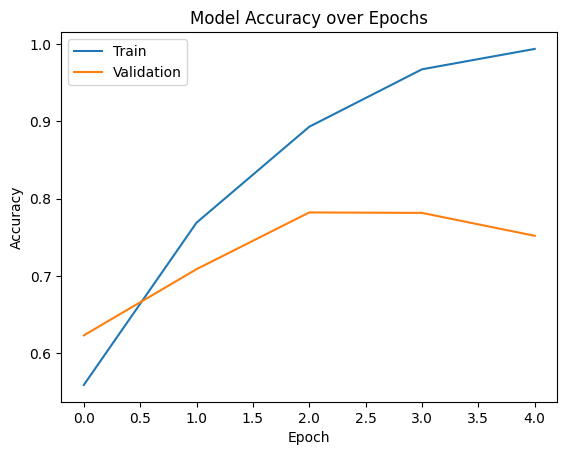

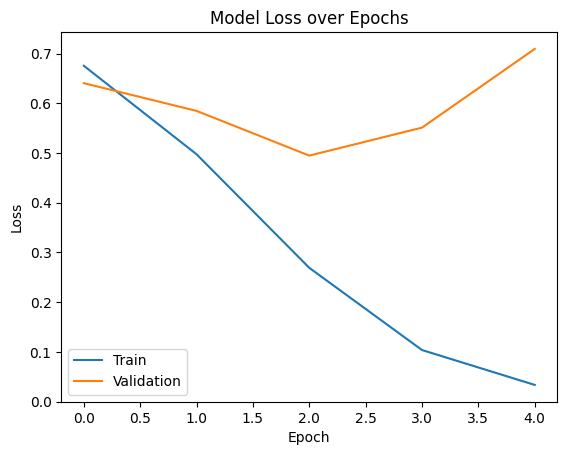

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Predicted Sentiment: Positive


In [ ]:
# 1. Import necessary libraries
import numpy as np  # Import NumPy for numerical computations, arrays, and mathematical operations
from tensorflow.keras.datasets import imdb  # Import the IMDB dataset of movie reviews, preprocessed as integer sequences
from tensorflow.keras.models import Sequential  # Import Sequential model to build a stack of layers in order
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense  # Import neural network layers: embedding, RNN, and fully connected
from tensorflow.keras.preprocessing import sequence  # Import sequence preprocessing utilities for padding/truncating sequences

# 2. Set parameters for the dataset
max_features = 10000  # Consider only the top 10,000 most frequently occurring words in the dataset. Less frequent words will be ignored.
maxlen = 500  # Maximum length of a review in words. Longer reviews will be truncated and shorter ones padded with zeros.

# 3. Load the IMDB dataset
# The dataset returns integer-encoded reviews (each word is replaced by an integer index)
# x_train, y_train: training reviews and labels (0 = negative, 1 = positive)
# x_test, y_test: test reviews and labels
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 4. Pad sequences so that all reviews have the same length
# Neural networks require fixed input sizes, so we pad shorter sequences with zeros at the beginning or end
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)  # Pad or truncate training reviews to maxlen
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)  # Pad or truncate test reviews to maxlen

# 5. Build the RNN model
model = Sequential()  # Initialize an empty sequential model to stack layers

# Embedding layer converts integer-encoded words into dense vectors of fixed size (embedding dimension = 32)
# This allows the network to learn relationships between words and represent them in a continuous vector space
model.add(Embedding(max_features, 32))  # Input dimension = vocab size, output dimension = 32, input_length = maxlen by default

# SimpleRNN layer with 32 hidden units
# Processes the sequence of word embeddings step by step and maintains a hidden state as memory
# The hidden state captures information about previous words in the sequence
model.add(SimpleRNN(32))

# Dense layer with 1 neuron and sigmoid activation for binary classification
# Sigmoid outputs a probability between 0 and 1, representing the likelihood of a positive review
model.add(Dense(1, activation='sigmoid'))

# 6. Compile the model
# Optimizer 'adam' efficiently updates weights using gradients
# Loss function 'binary_crossentropy' measures how well predictions match binary labels
# Metric 'accuracy' monitors the fraction of correctly predicted reviews
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. Train the model
# Train on x_train, y_train data
# epochs=5: number of passes over the entire training data
# batch_size=64: number of samples processed before updating the weights
# validation_split=0.2: 20% of training data is used to evaluate model performance after each epoch
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# 8. Evaluate the model on test data
# Returns loss and accuracy on unseen test data, to see how well the model generalizes
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")  # Print test accuracy formatted to 2 decimal places

# 9. Plot training and validation accuracy and loss
import matplotlib.pyplot as plt  # Import matplotlib for visualization

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'])  # Training accuracy
plt.plot(history.history['val_accuracy'])  # Validation accuracy
plt.title('Model Accuracy over Epochs')  # Title of the plot
plt.xlabel('Epoch')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend(['Train', 'Validation'])  # Legend to distinguish curves
plt.show()  # Display the plot

# Plot training and validation loss over epochs
plt.plot(history.history['loss'])  # Training loss
plt.plot(history.history['val_loss'])  # Validation loss
plt.title('Model Loss over Epochs')  # Title of the plot
plt.xlabel('Epoch')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend(['Train', 'Validation'])  # Legend to distinguish curves
plt.show()  # Display the plot

# 10. Predict sentiment on a sample review
# For demonstration, we use an existing review from x_test
sample_review = x_test[0]  # Take the first review from the test set
sample_review_input = np.expand_dims(sample_review, axis=0)  # Add batch dimension because model expects a batch of inputs
prediction = model.predict(sample_review_input)[0][0]  # Predict probability of positive sentiment

# Interpret the prediction
if prediction > 0.5:
    print("Predicted Sentiment: Positive")  # Probability > 0.5 indicates positive review
else:
    print("Predicted Sentiment: Negative")  # Probability <= 0.5 indicates negative review


